# Classification using linear SVM
in this project we are going to classify 2d data using linear SVM, using sklearn library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer



In [2]:
#read dataset by path and file's name
def read_dataset(path, name):
    df = pd.read_csv(path + name, header=None)
    return df

In [3]:
df = read_dataset("datasets/", "binary_2d.csv")

## train and test

In [4]:
data = df.iloc[:,0:2]
labels = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=0)
mySvm = svm.SVC(kernel='linear')
y_pred = mySvm.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
print("accuracy: ", accuracy*100)
print("error: ", error*100)

accuracy:  92.0
error:  7.9999999999999964


## Plotting

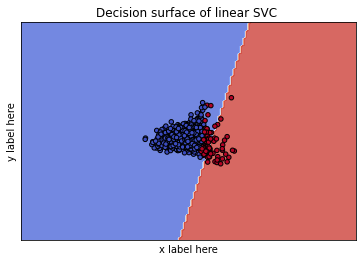

In [5]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.

X = data.to_numpy()
y = labels.to_numpy()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, mySvm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', linewidth=1)
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()